In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
#!pip install plotly

In [3]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = False)

In [4]:
#Read the data
df=pd.read_csv("aug_train.csv")

In [7]:
#Head of the dataframe
df.head()

enrollee_id      city  ...  training_hours target
0         8949  city_103  ...              36    1.0
1        29725   city_40  ...              47    0.0
2        11561   city_21  ...              83    0.0
3        33241  city_115  ...              52    1.0
4          666  city_162  ...               8    0.0

[5 rows x 14 columns]

In [8]:
#Let's look at the tail of the dataframe
df.tail()

enrollee_id      city  ...  training_hours target
19153         7386  city_173  ...              42    1.0
19154        31398  city_103  ...              52    1.0
19155        24576  city_103  ...              44    0.0
19156         5756   city_65  ...              97    0.0
19157        23834   city_67  ...             127    0.0

[5 rows x 14 columns]

In [9]:
#Shape of the dataframe
df.shape
print("no of observation:", df.shape[0])
print("no of features:", df.shape[1])

no of observation: 19158
no of features: 14


In [10]:
#Print information of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## EDA

In [11]:
# print Summary of our features with describe function

In [12]:
df[["city_development_index","training_hours"]].describe()

city_development_index  training_hours
count            19158.000000    19158.000000
mean                 0.828848       65.366896
std                  0.123362       60.058462
min                  0.448000        1.000000
25%                  0.740000       23.000000
50%                  0.903000       47.000000
75%                  0.920000       88.000000
max                  0.949000      336.000000

In [13]:
df.drop(["enrollee_id","city_development_index","training_hours","target"],axis=1).describe()

city gender  ... company_type last_new_job
count      19158  14650  ...        13018        18735
unique       123      3  ...            6            6
top     city_103   Male  ...      Pvt Ltd            1
freq        4355  13221  ...         9817         8040

[4 rows x 10 columns]

In [14]:
#Let's plot our target variable

In [15]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [7]:
target = df.target.value_counts().reset_index().rename(columns={'index':'target','target':'count'})

fig = px.pie(target, values = 'count', names = 'target')
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.5, 
                  marker = dict(colors = ['red','green'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Job search', title_x = 0.5, title_y = 0.53, title_font_size = 32, 
                  title_font_family = 'Calibri Black', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

In [17]:
#Most of the variables are categorical variables so let's plot countplot and pieplots for each variable
#Histograms for continous variables for understanding distribution
#Plot the features in the context of relationship with target variable and its characterstics

#### City_code

In [18]:
#Let's check most frequent city_codes of dataset

In [19]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [20]:
df.city.value_counts()
#We have 123 different types of city codes

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

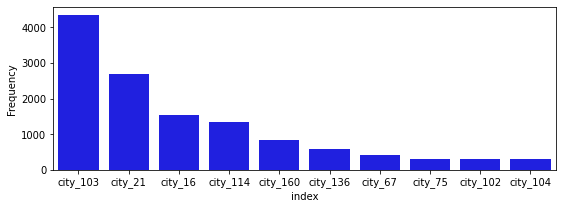

In [21]:
#Let's plot counts of top 10 frequent city_codes
df_city=pd.DataFrame(df['city'].value_counts().reset_index())[:10]
plt.figure(figsize=(9,3))
sns.barplot(x="index",y="city",data=df_city, color="blue")
plt.ylabel("Frequency")
plt.show()

#### City_development index

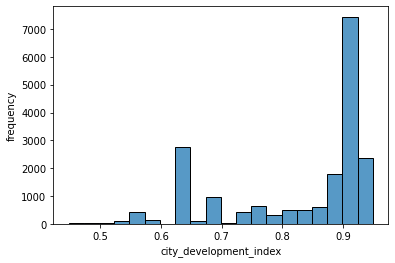

In [22]:
#Plot distribution of
sns.histplot(df["city_development_index"],bins=20)
plt.ylabel("frequency")
plt.show()
#From the plot we can say most of the observations around 0.9

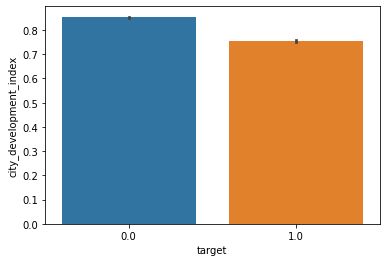

In [23]:
sns.barplot(x=df["target"],y=df["city_development_index"]);

In [24]:
#Avg city development index of two classes are almost same

#### Gender

In [25]:
#Gender column having  23% missing values

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


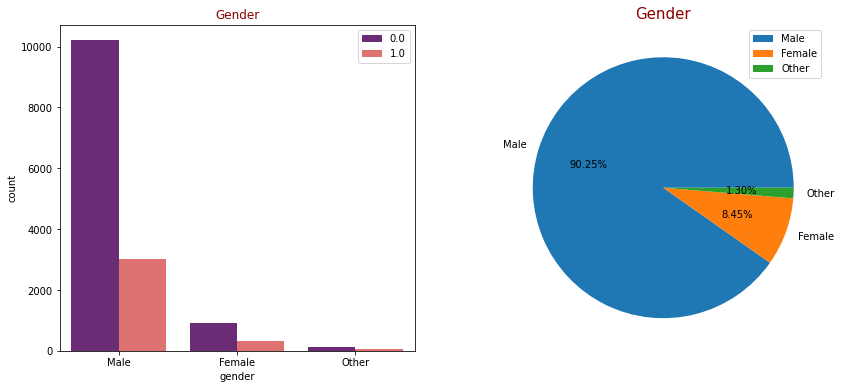

In [26]:
#gender 
gender = df["gender"].value_counts()
print(gender)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(df["gender"], hue = "target", data = df,palette="magma")
plt.title("Gender", color = "darkred")
plt.legend()

plt.subplot(1,2,2)
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

In [27]:
#Our data is biased towards Male employees because almost 90% of employees are Male

#### Relevent_experience 

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


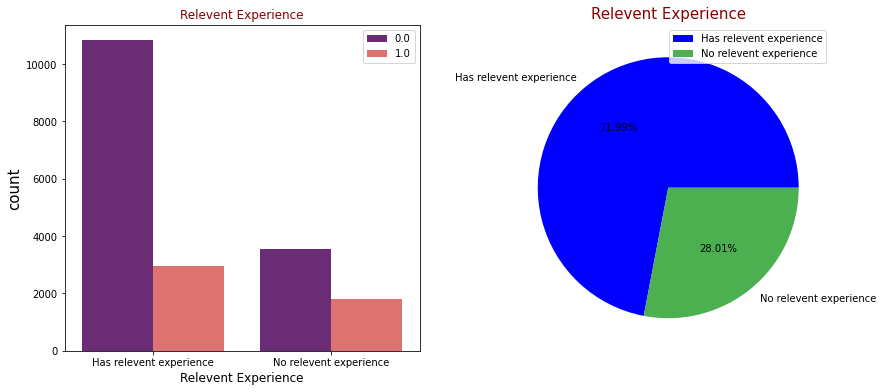

In [28]:
#relevent_experience

experience = df["relevent_experience"].value_counts()
print(experience)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.countplot(df["relevent_experience"], hue = "target", data = df,palette="magma")
plt.xlabel('Relevent Experience', size = 12, color = "black") 
plt.ylabel('count', size = 15) 
plt.title('Relevent Experience', color = "darkred")
plt.legend()

plt.subplot(1,2,2)
colrs= [ "b", "#4CAF50"]
plt.pie(experience.values, labels=experience.index, autopct='%1.2f%%',colors=colrs)
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

In [29]:
#Most of the employees having relevent experience

#### Enrolled_university

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


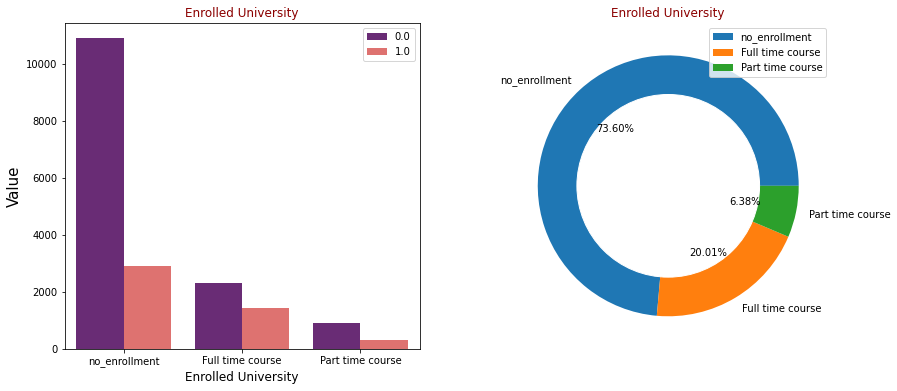

In [30]:
university = df["enrolled_university"].value_counts()
print(university)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.countplot(df["enrolled_university"], hue = "target", data = df,palette="magma")
plt.xlabel('Enrolled University', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.legend()

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(university.values, labels = university.index,  autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Enrolled University", color = "darkred")
plt.legend()
plt.show()

In [31]:
#Most of the employees not enrolled to any university

#### Education_level

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


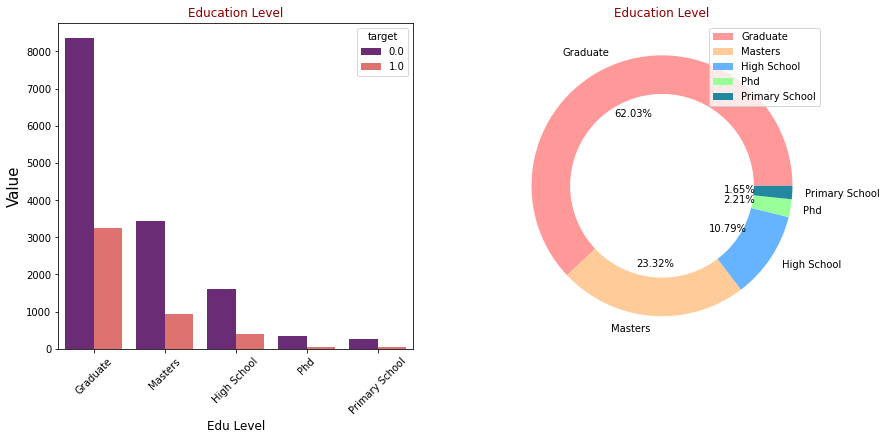

In [32]:
#education_level

edu_level = df["education_level"].value_counts()
print(edu_level)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax = sns.countplot(df["education_level"], hue = "target", data = df,palette="magma")
plt.xlabel('Edu Level', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Education Level', color = "darkred")

#add colors
colors = ['#ff9999','#ffcc99','#66b3ff','#99ff99','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Education Level", color = "darkred")
plt.legend()
plt.show()

#### major discipline

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


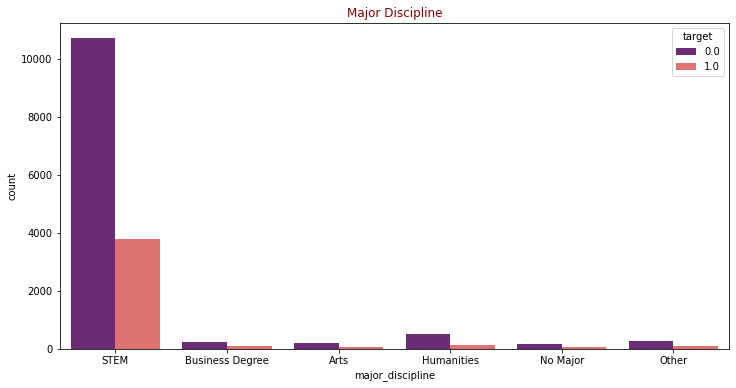

In [33]:
print(df["major_discipline"].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(df["major_discipline"],hue = "target", data = df,palette="magma")
plt.title("Major Discipline", color = "darkred")
plt.show()

In [34]:
#Most of the employees major_secipline is stem

#### Company_size

In [5]:
company_size = df["company_size"].value_counts()

print(company_size)

cs = df.groupby(['target', 'company_size']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.sunburst(cs,path = ['target', 'company_size'],  values = 'count', color = 'target',
                 color_discrete_map = {'Looking for a job change': 'red', 'Not looking for job change': 'green'},
                 width = 600, height = 600)

fig.update_layout(annotations = [dict(text = 'Affect of company size on the desire to change job', 
                                      x = 0.5, y = 1.1, font_size = 14, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


#### Company_type

In [6]:
print(df["company_type"].value_counts())
cs = df.groupby(['target', 'company_type']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.sunburst(cs,path = ['target', 'company_type'],  values = 'count', color = 'target',
                 color_discrete_map = {'Looking for a job change': 'red', 'Not looking for job change': 'green'},
                 width = 600, height = 600)

fig.update_layout(annotations = [dict(text = 'Affect of company type on the desire to change job', 
                                      x = 0.5, y = 1.1, font_size = 14, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64


In [37]:
# Most of the employees are from private limited companies

#### Years b/w previous job and current job

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


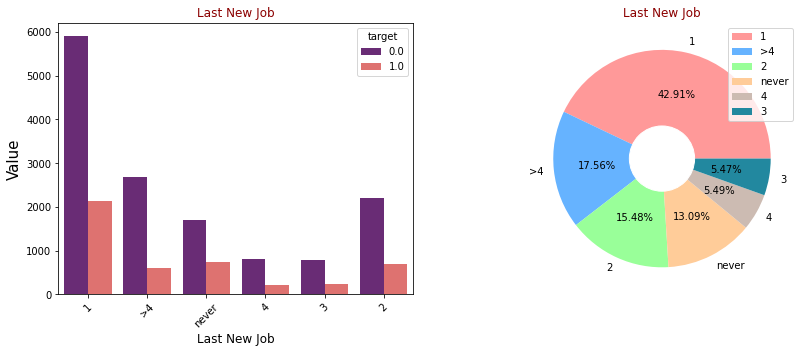

In [38]:
# last_new_job 
last_new = df["last_new_job"].value_counts()

print(last_new)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax= sns.countplot(df["last_new_job"], hue = "target", data = df,palette="magma")
plt.xlabel('Last New Job', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Last New Job', color = "darkred")

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ccbbb2','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.3,color = "white")
plt.pie(last_new.values, labels = last_new.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Last New Job", color = "darkred")
plt.legend()
plt.show()

In [39]:
#For the majority of employees gap is one year

#### Training hours

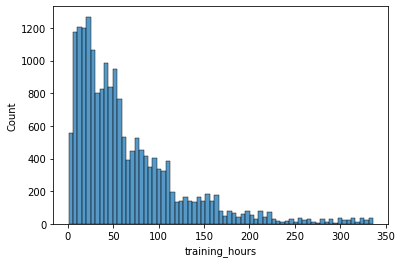

In [40]:
#Lets see distribution of training hours
sns.histplot(df["training_hours"])

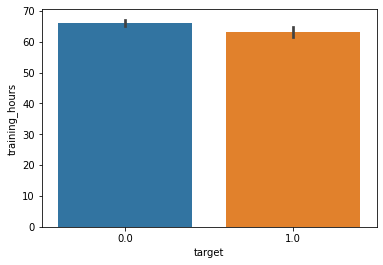

In [41]:
#avg training hours of target classes
sns.barplot(x=df["target"],y=df["training_hours"]);

In [42]:
#Avg training hours of both the classes are almost same

## Missing Values Treatment

In [43]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
target                       0
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [44]:
#Print percentage of missing values in each variable
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(df)

Count Missing  Percent Missing
enrollee_id                         0         0.000000
city                                0         0.000000
city_development_index              0         0.000000
gender                           4508        23.530640
relevent_experience                 0         0.000000
enrolled_university               386         2.014824
education_level                   460         2.401086
major_discipline                 2813        14.683161
experience                         65         0.339284
company_size                     5938        30.994885
company_type                     6140        32.049274
last_new_job                      423         2.207955
training_hours                      0         0.000000
target                              0         0.000000

### Plot Misssing Values

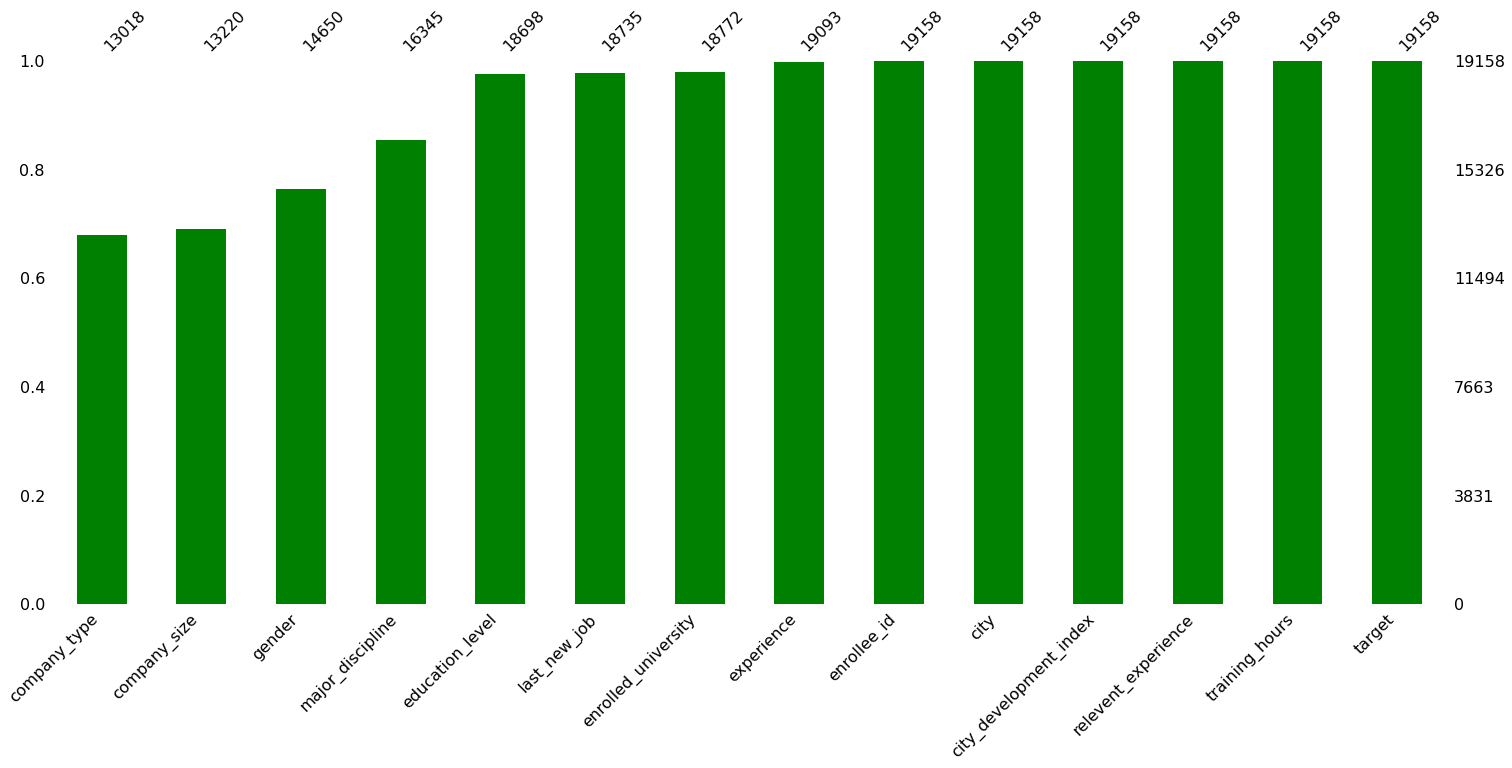

In [45]:
import missingno as msn
#Plot the missing values for better understanding
#Plot count of missing values in barchart
msn.bar(df,sort="ascending",color="green");

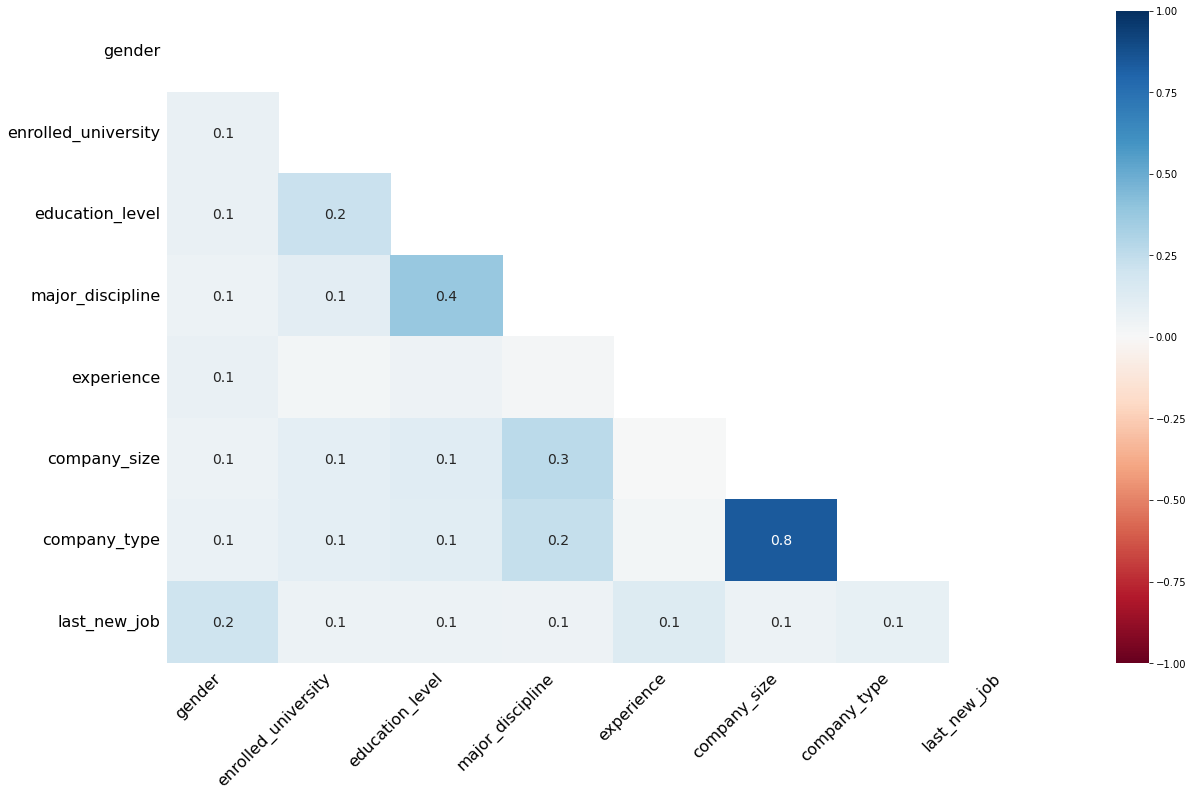

In [46]:

#Plotting corelation between missing valued columns
msn.heatmap(df);
#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.

In [47]:
#We can observe that company_size and company_type variable having missing values are correlated that
#means if any observation having missing value in company_type it's also having missing value in company_size(correlation=0.8)

### Drop Irrelevent columns

In [48]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [49]:
y=df["target"]

In [50]:
df.drop(["enrollee_id",'city',"target"],axis=1,inplace=True)

### Missing values imputation with simple imputer

In [51]:
#company size and company type missing values are correlated so first i will fill missing values in company size with null and after applying
# simple imputer again it will convert it to np.nan and than i will fill with modes of individual groups.
df["company_size"].fillna("null",inplace=True)

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
sm=SimpleImputer(strategy="most_frequent")

In [54]:
df_imp=sm.fit_transform(df)

In [55]:
df_imp=pd.DataFrame(df_imp,columns=df.columns)

In [56]:
#converrt null values to it's original state
df_imp["company_size"].replace("null",np.nan,inplace=True)

In [57]:
#Now fill null values with individual group modes
#For example null values related to pvt ltd company will fill with mode of pvt limited company group.
for i in df_imp.company_type.unique():
    if df_imp.company_size[df.company_type == i].isnull().sum() > 0:
        df_imp.loc[df_imp.company_type == i,'company_size'] = \
        df_imp.loc[df_imp.company_type == i,'company_size'].fillna(df_imp.loc[df_imp.company_type == i,'company_size'].mode()[0])

In [58]:
df_imp.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

## Dummy Encoding

In [59]:
df_dummy=pd.get_dummies(df_imp,columns=df.drop(["city_development_index","training_hours"],axis=1).columns
                        ,drop_first=True)

In [60]:
df_dummy.shape

(19158, 54)

In [61]:
print(df_dummy.columns.values)

['city_development_index' 'training_hours' 'gender_Male' 'gender_Other'
 'relevent_experience_No relevent experience'
 'enrolled_university_Part time course'
 'enrolled_university_no_enrollment' 'education_level_High School'
 'education_level_Masters' 'education_level_Phd'
 'education_level_Primary School' 'major_discipline_Business Degree'
 'major_discipline_Humanities' 'major_discipline_No Major'
 'major_discipline_Other' 'major_discipline_STEM' 'experience_10'
 'experience_11' 'experience_12' 'experience_13' 'experience_14'
 'experience_15' 'experience_16' 'experience_17' 'experience_18'
 'experience_19' 'experience_2' 'experience_20' 'experience_3'
 'experience_4' 'experience_5' 'experience_6' 'experience_7'
 'experience_8' 'experience_9' 'experience_<1' 'experience_>20'
 'company_size_100-500' 'company_size_1000-4999' 'company_size_10000+'
 'company_size_50-99' 'company_size_500-999' 'company_size_5000-9999'
 'company_size_<10' 'company_type_Funded Startup' 'company_type_NGO'
 'co

### Scaling Numerical features with standard scalar

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [63]:
ss.fit_transform(df[["city_development_index","city_development_index"]])

array([[ 0.73891926,  0.73891926],
       [-0.42840976, -0.42840976],
       [-1.66059039, -1.66059039],
       ...,
       [ 0.73891926,  0.73891926],
       [-0.21764202, -0.21764202],
       [ 0.21199991,  0.21199991]])

In [64]:
df[["city_development_index","city_development_index"]]=ss.fit_transform(df[["city_development_index","city_development_index"]])

## Feature Selection

### With Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [66]:
rf=RandomForestClassifier()
rf.fit(df_dummy,y)
imp = pd.DataFrame(rf.feature_importances_ ,columns = ['importance'],index = df_dummy.columns)
imp = imp.sort_values(['importance'], ascending = False)
#Print feature_iportances in acending order
print(imp)

                                            importance
training_hours                                0.285174
city_development_index                        0.254497
company_size_50-99                            0.025798
education_level_Masters                       0.022269
last_new_job_2                                0.021411
enrolled_university_no_enrollment             0.021358
relevent_experience_No relevent experience    0.020338
last_new_job_never                            0.016297
gender_Male                                   0.015041
education_level_High School                   0.014405
last_new_job_>4                               0.014360
company_type_Pvt Ltd                          0.011395
experience_5                                  0.011144
last_new_job_3                                0.011140
experience_4                                  0.010714
experience_3                                  0.010604
experience_6                                  0.010333
experience

### Feature Importance

In [67]:
plot_features=imp[:15]
feature_imp=pd.DataFrame(plot_features.reset_index().rename(columns={"index":"feature"}))
print(feature_imp)

                                       feature  importance
0                               training_hours    0.285174
1                       city_development_index    0.254497
2                           company_size_50-99    0.025798
3                      education_level_Masters    0.022269
4                               last_new_job_2    0.021411
5            enrolled_university_no_enrollment    0.021358
6   relevent_experience_No relevent experience    0.020338
7                           last_new_job_never    0.016297
8                                  gender_Male    0.015041
9                  education_level_High School    0.014405
10                             last_new_job_>4    0.014360
11                        company_type_Pvt Ltd    0.011395
12                                experience_5    0.011144
13                              last_new_job_3    0.011140
14                                experience_4    0.010714


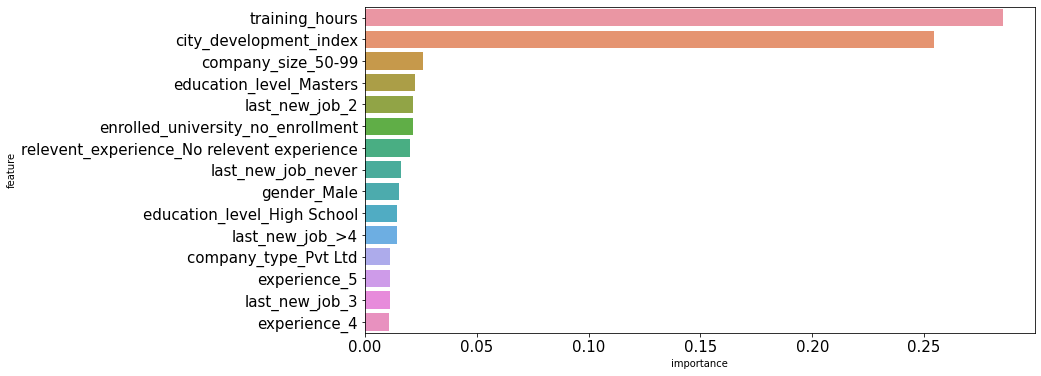

In [68]:
plt.figure(figsize = (12,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# We sort by importance and get the features
sns.barplot(x = 'importance', y = 'feature', data = feature_imp, 
            order = feature_imp.sort_values('importance', ascending=False).feature) ;

In [69]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rf, prefit=True)
x_train=model.transform(df_dummy)

In [70]:
feature_idx = model.get_support()
feature_kept = df_dummy.columns[feature_idx]

In [71]:
print(feature_kept)

Index(['city_development_index', 'training_hours',
       'relevent_experience_No relevent experience',
       'enrolled_university_no_enrollment', 'education_level_Masters',
       'company_size_50-99', 'last_new_job_2'],
      dtype='object')


In [72]:
x_train=df_dummy[feature_kept]

In [73]:
x_train.shape

(19158, 7)

### Split the model for Training and Evaluation

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(x_train,y,stratify=y,random_state=101,test_size=0.3)

In [76]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13410, 7), (13410,), (5748, 7), (5748,))

## Random Over Sampling with SMOTE

In [77]:
#Before Over Sampling
y_train.value_counts()

0.0    10066
1.0     3344
Name: target, dtype: int64

In [78]:
#Our datset is imbalnced classes for dependent variable
#By using SMOTE over sampling balnce the dataset
from imblearn.over_sampling import SMOTE

In [79]:
sm=SMOTE()

In [80]:
X_train,y_train=sm.fit_resample(x_train,y)

In [81]:
#Now our dataset is balanced
y_train.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

## Train the Model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_roc_curve,f1_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [83]:
# This function plots the confusion matrices given y_i, y_i_hat(predicted).
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    # Initialise the subplot function using number of rows and columns

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    cmap2=sns.light_palette("#34c3eb")
    cmap3=sns.light_palette("purple")
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap2, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap3, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

In [84]:
#Each model accuarcy is storing in a list
result=[]

## Logistic Regression



RESULTS :
Logistic Regression Model Acc :  0.71
LR Model F1-score :  0.53
Classification Report :               precision    recall  f1-score   support

         0.0       0.86      0.74      0.79      4315
         1.0       0.45      0.65      0.53      1433

    accuracy                           0.71      5748
   macro avg       0.66      0.69      0.66      5748
weighted avg       0.76      0.71      0.73      5748





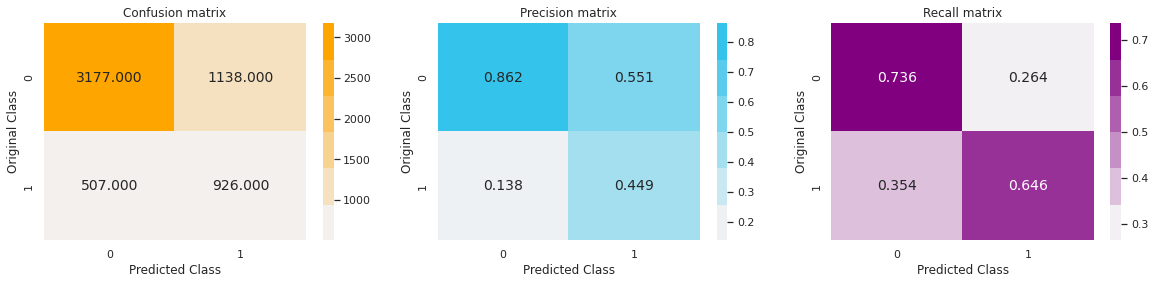

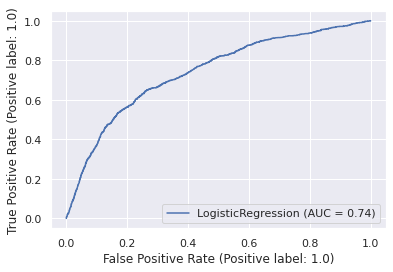

In [85]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred_lr)
fscore_lr=f1_score(y_test,y_pred_lr)
result.append(acc_lr)

print('\n')
print("RESULTS :")
print("Logistic Regression Model Acc : ",round(acc_lr,2))
print("LR Model F1-score : ",round(fscore_lr,2))
print("Classification Report :",classification_report(y_test,y_pred_lr))
print('\n')
plot_confusion_matrix(y_test, y_pred_lr)
plot_roc_curve(lr,X_test,y_test);

## KNeighborsClassifier

Fitting 10 folds for each of 40 candidates, totalling 400 fits


RESULTS :
KNN Model Acc :  0.91
KNN Model F1-score :  0.82
Classification Report :               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      4315
         1.0       0.84      0.80      0.82      1433

    accuracy                           0.91      5748
   macro avg       0.89      0.88      0.88      5748
weighted avg       0.91      0.91      0.91      5748





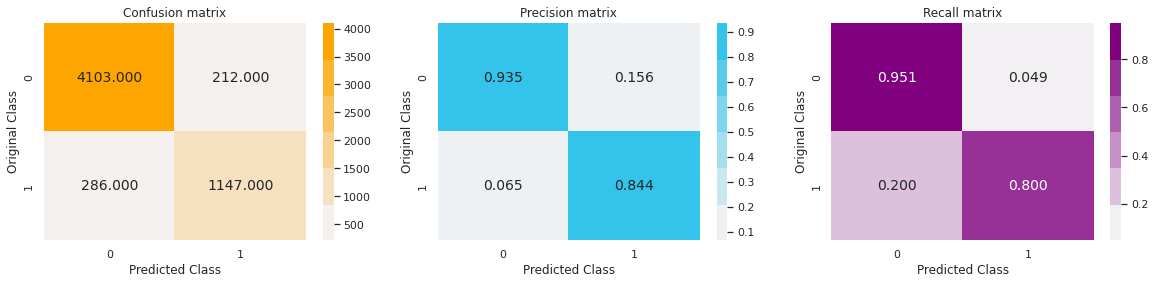

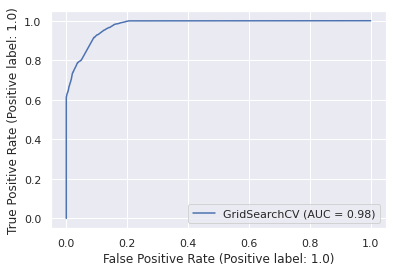

In [86]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
fscore = f1_score(y_test,y_pred_knn)
result.append(acc_random_knn)

print('\n')
print("RESULTS :")
print("KNN Model Acc : ",round(acc_random_knn,2))
print("KNN Model F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred_knn))
print('\n')
plot_confusion_matrix(y_test, y_pred_knn)
plot_roc_curve(clf,X_test,y_test)

## SVM Classifier

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RESULTS :
SVC Model Acc :  0.73
SVC Model F1-score :  0.57
Classification Report :               precision    recall  f1-score   support

         0.0       0.89      0.72      0.80      4315
         1.0       0.47      0.74      0.57      1433

    accuracy                           0.73      5748
   macro avg       0.68      0.73      0.69      5748
weighted avg       0.79      0.73      0.74      5748





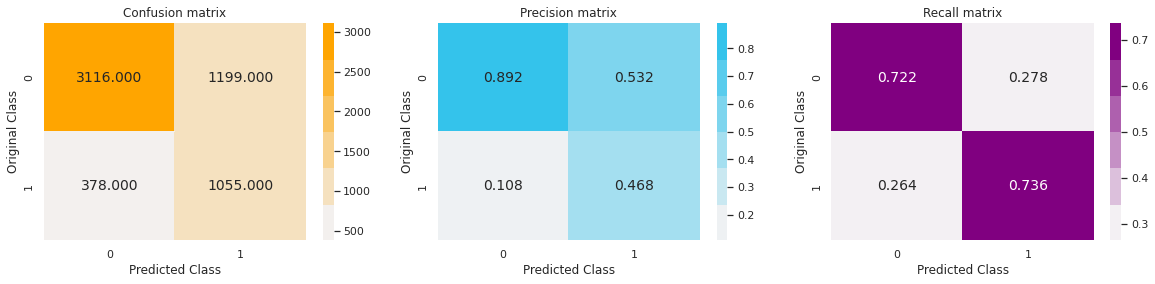

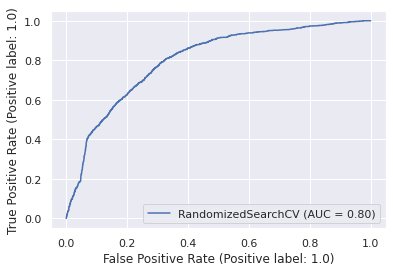

In [87]:
svm_param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
svc = SVC()
clf = RandomizedSearchCV(svc,param_distributions=svm_param_grid,cv = StratifiedKFold(n_splits = 3),
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_svc = clf.predict(X_test)
acc_random_svc = accuracy_score(y_test, y_pred_svc)
fscore_svc = f1_score(y_test,y_pred_svc)
result.append(acc_random_svc)

print('\n')

print("RESULTS :")
print("SVC Model Acc : ",round(acc_random_svc,2))
print("SVC Model F1-score : ",round(fscore_svc,2))
print("Classification Report :",classification_report(y_test,y_pred_svc))
print('\n')
plot_confusion_matrix(y_test, y_pred_svc)
plot_roc_curve(clf,X_test,y_test);

## Naive Bayes Classifier



RESULTS :
Naive Bayes Model Acc :  0.67
NB Model F1-score :  0.48
Classification Report :               precision    recall  f1-score   support

         0.0       0.84      0.69      0.76      4315
         1.0       0.39      0.61      0.48      1433

    accuracy                           0.67      5748
   macro avg       0.62      0.65      0.62      5748
weighted avg       0.73      0.67      0.69      5748





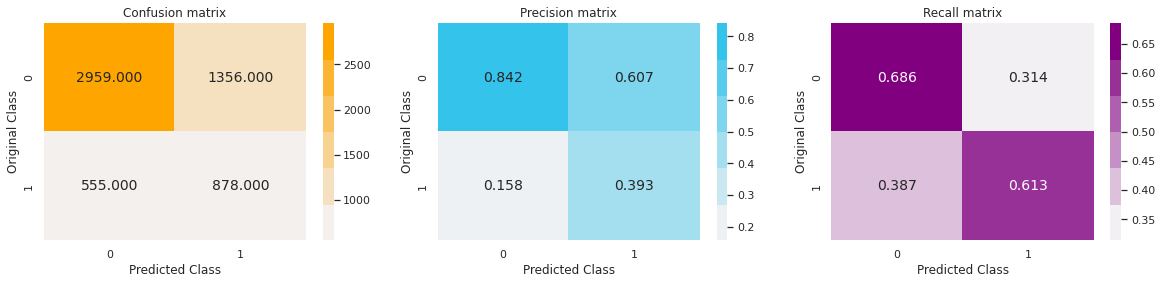

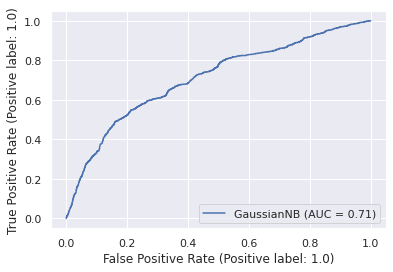

In [88]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred_nb)
fscore_nb=f1_score(y_test,y_pred_nb)
result.append(acc_nb)

print('\n')
print("RESULTS :")
print("Naive Bayes Model Acc : ",round(acc_nb,2))
print("NB Model F1-score : ",round(fscore_nb,2))
print("Classification Report :",classification_report(y_test,y_pred_nb))
print('\n')
plot_confusion_matrix(y_test, y_pred_nb)
plot_roc_curve(nb,X_test,y_test);

### Random Forest Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RESULTS :
Random Forest Model Acc :  0.84
RF Model F1-score :  0.7
Classification Report :               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      4315
         1.0       0.66      0.74      0.70      1433

    accuracy                           0.84      5748
   macro avg       0.79      0.81      0.80      5748
weighted avg       0.85      0.84      0.84      5748





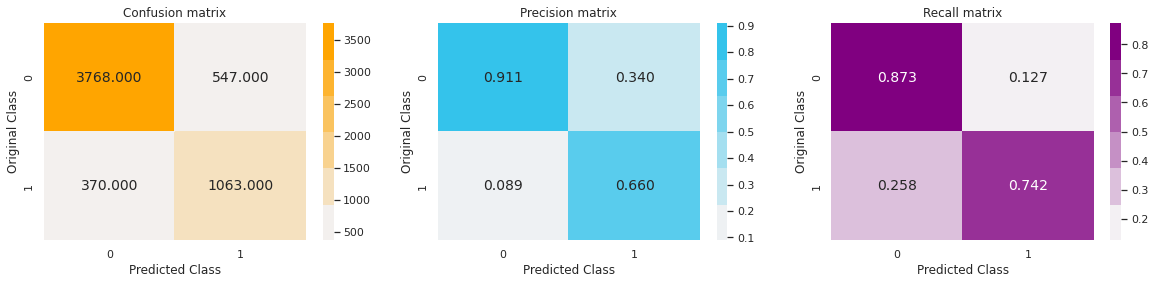

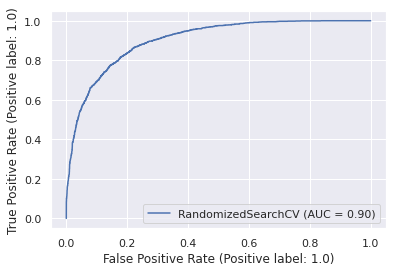

In [89]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf=RandomForestClassifier()
clf = RandomizedSearchCV(rf, param_distributions=random_grid, cv = StratifiedKFold(n_splits = 5), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_rf = clf.predict(X_test)
acc_random_rf = accuracy_score(y_test, y_pred_rf)
fscore_rf = f1_score(y_test,y_pred_rf)
result.append(acc_random_rf)

print('\n')
print("RESULTS :")
print("Random Forest Model Acc : ",round(acc_random_rf,2))
print("RF Model F1-score : ",round(fscore_rf,2))
print("Classification Report :",classification_report(y_test,y_pred_rf))
print('\n')
plot_confusion_matrix(y_test, y_pred_rf)
plot_roc_curve(clf,X_test,y_test)

## ExtraTree Classifier

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RESULTS :
EXTRA TREE Model Acc :  0.89
ET Model F1-score :  0.78
Classification Report :               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      4315
         1.0       0.79      0.78      0.78      1433

    accuracy                           0.89      5748
   macro avg       0.86      0.85      0.86      5748
weighted avg       0.89      0.89      0.89      5748





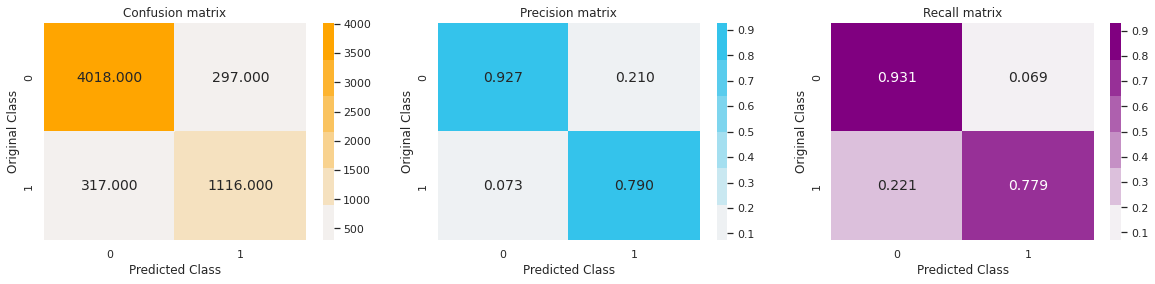

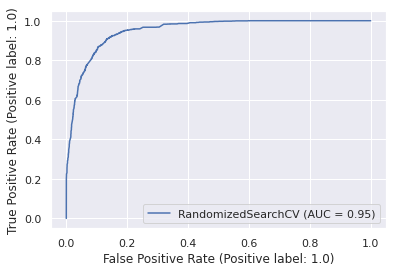

In [93]:
random_grid={"min_samples_split":[2,5,10,20],
            "max_features":[i for i in range(7)],
            "n_estimators":[int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]}
ec=ExtraTreesClassifier()
clf = RandomizedSearchCV(ec, param_distributions=random_grid, cv = StratifiedKFold(n_splits = 3), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_ec = clf.predict(X_test)
acc_random_ec = accuracy_score(y_test, y_pred_ec)
fscore_ec = f1_score(y_test,y_pred_ec)
result.append(acc_random_ec)

print('\n')
print("RESULTS :")
print("EXTRA TREE Model Acc : ",round(acc_random_ec,2))
print("ET Model F1-score : ",round(fscore_ec,2))
print("Classification Report :",classification_report(y_test,y_pred_ec))
print('\n')
plot_confusion_matrix(y_test, y_pred_ec)
plot_roc_curve(clf,X_test,y_test)

## Adaboost Classifier

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RESULTS :
ADA BOOST Model Acc :  0.75
ABC Model F1-score :  0.52
Classification Report :               precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      4315
         1.0       0.50      0.55      0.52      1433

    accuracy                           0.75      5748
   macro avg       0.67      0.68      0.68      5748
weighted avg       0.76      0.75      0.75      5748





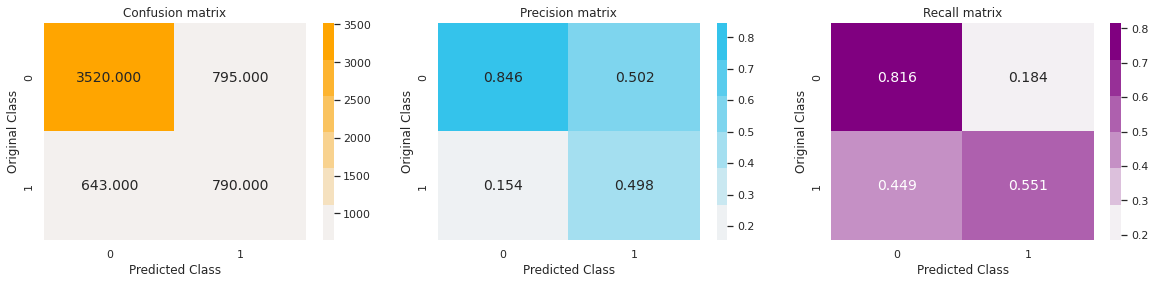

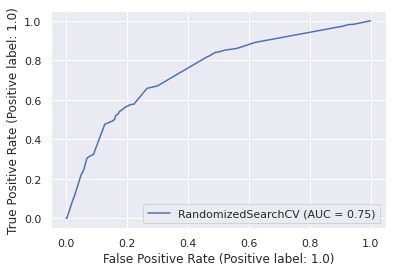

In [103]:
random_grid={"learning_rate":[x for x in np.linspace(0,2,20)]}

ac=AdaBoostClassifier()
clf = RandomizedSearchCV(ac, param_distributions=random_grid, cv = StratifiedKFold(n_splits = 3), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_ac = clf.predict(X_test)
acc_random_ac = accuracy_score(y_test, y_pred_ac)
fscore_ac = f1_score(y_test,y_pred_ac)
result.append(acc_random_ac)

print('\n')
print("RESULTS :")
print("ADA BOOST Model Acc : ",round(acc_random_ac,2))
print("ABC Model F1-score : ",round(fscore_ac,2))
print("Classification Report :",classification_report(y_test,y_pred_ac))
print('\n')
plot_confusion_matrix(y_test, y_pred_ac)
plot_roc_curve(clf,X_test,y_test)


## Gradient Boost Classifier

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RESULTS :
GB Classifier Model Acc :  0.87
GBC Model F1-score :  0.74
Classification Report :               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      4315
         1.0       0.73      0.76      0.74      1433

    accuracy                           0.87      5748
   macro avg       0.82      0.83      0.83      5748
weighted avg       0.87      0.87      0.87      5748





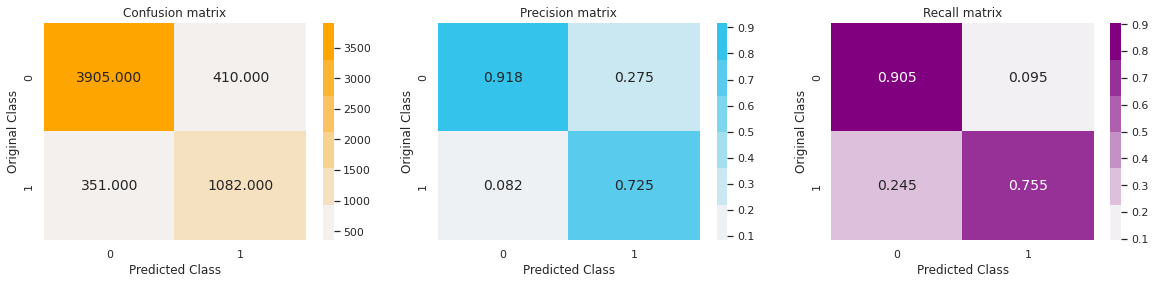

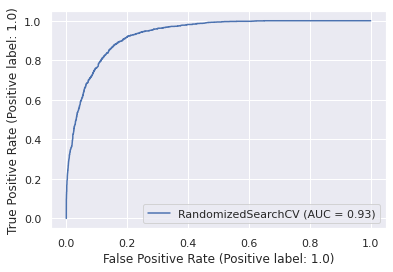

In [95]:
random_grid={'min_samples_split':[2,5,10,15,20], 
             'min_samples_leaf':[5,10,20,30,40],
             'max_depth':range(5,16,2),
             "n_estimators":[int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]}

gbm=GradientBoostingClassifier()
clf = RandomizedSearchCV(gbm, param_distributions=random_grid, cv = StratifiedKFold(n_splits = 3), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_gbm = clf.predict(X_test)
acc_random_gbm = accuracy_score(y_test, y_pred_gbm)
fscore_gbm = f1_score(y_test,y_pred_gbm)
result.append(acc_random_gbm)

print('\n')
print("RESULTS :")
print("GB Classifier Model Acc : ",round(acc_random_gbm,2))
print("GBC Model F1-score : ",round(fscore_gbm,2))
print("Classification Report :",classification_report(y_test,y_pred_gbm))
print('\n')
plot_confusion_matrix(y_test, y_pred_gbm)
plot_roc_curve(clf,X_test,y_test)

## XGB Classifier

In [121]:
X_train["city_development_index"]=X_train["city_development_index"].astype("float")
X_train["training_hours"]=X_train["training_hours"].astype("float")
X_test["city_development_index"]=X_test["city_development_index"].astype("float")
X_test["training_hours"]=X_test["training_hours"].astype("float")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
RESULTS : 
XGBoost Model Accuracy :  0.82
XGBoost Model F1-score :  0.64
Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      4315
         1.0       0.63      0.65      0.64      1433

    accuracy                           0.82      5748
   macro avg       0.75      0.76      0.76      5748
weighted avg       0.82      0.82      0.82      5748







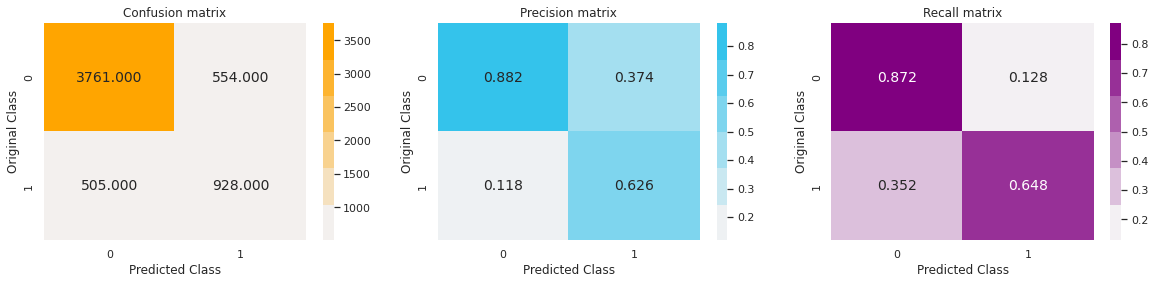

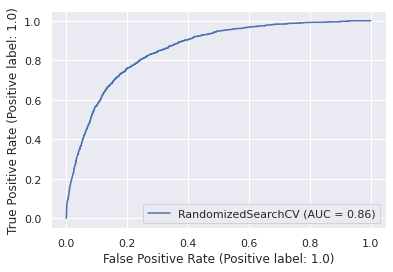

In [124]:
#XGB Classifier
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.001,0.01,0.1,0.3,0.5],
              "max_depth":[3,5,10,15],
              'min_child_weight': [3,5,7,9],
              'silent': [1],
              'subsample': [0.1,0.3,0.5,0.7],
              'colsample_bytree': [0.1,0.2,0.5,0.7],
              'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]}

XGB = xgb.XGBClassifier()
XGB = RandomizedSearchCV(XGB, parameters, cv = StratifiedKFold(3, shuffle=True), 
                   scoring='roc_auc',
                   verbose=1, refit=True)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)


print("RESULTS : ")
print("XGBoost Model Accuracy : ",round(acc_xgb,2))
print("XGBoost Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))
print('\n')
plot_confusion_matrix(y_test, y_pred_xgb)
print('\n')
plot_roc_curve(XGB,X_test,y_test)

## Light GBM

RESULTS :
LGB Model Accuracy :  0.77
LGB Model F1-score :  0.57
Classification Report :               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      4315
         1.0       0.53      0.62      0.57      1433

    accuracy                           0.77      5748
   macro avg       0.70      0.72      0.70      5748
weighted avg       0.78      0.77      0.77      5748







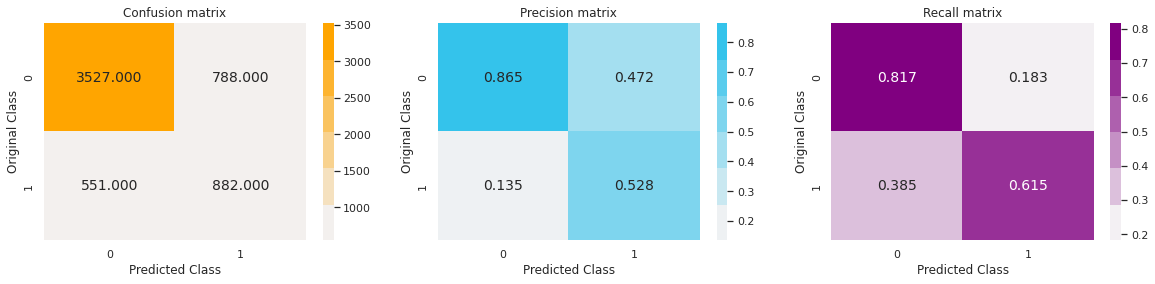

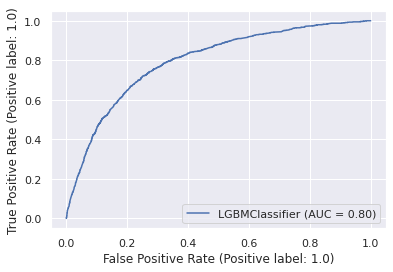

In [127]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)
y_pred=clf_lgb.predict(X_test)

fscore = f1_score(y_test,y_pred)
acc_lgb = accuracy_score(y_pred, y_test)
result.append(acc_lgb)

print("RESULTS :")
print("LGB Model Accuracy : ",round(acc_lgb,2))
print("LGB Model F1-score : ",round(fscore,2))
print("Classification Report :",classification_report(y_test,y_pred))
print('\n')
plot_confusion_matrix(y_test, y_pred)
print('\n')
plot_roc_curve(clf_lgb,X_test,y_test)

## Model Performances

In [138]:
model_results=pd.DataFrame({"Model" : ["Logistic Regression","KNN","SVM","Naive Bayes","Random Forest","Extra tree Classifier",
                                     "AdaBoost","GradientBoost","XGB","LightGBM"],"Accuracy":result})

In [139]:
model_results

Model  Accuracy
0    Logistic Regression  0.713814
1                    KNN  0.913361
2                    SVM  0.725644
3            Naive Bayes  0.667537
4          Random Forest  0.840466
5  Extra tree Classifier  0.893180
6               AdaBoost  0.867606
7          GradientBoost  0.749826
8                    XGB  0.815762
9               LightGBM  0.767049

In [141]:
## Plot Model Accuracies

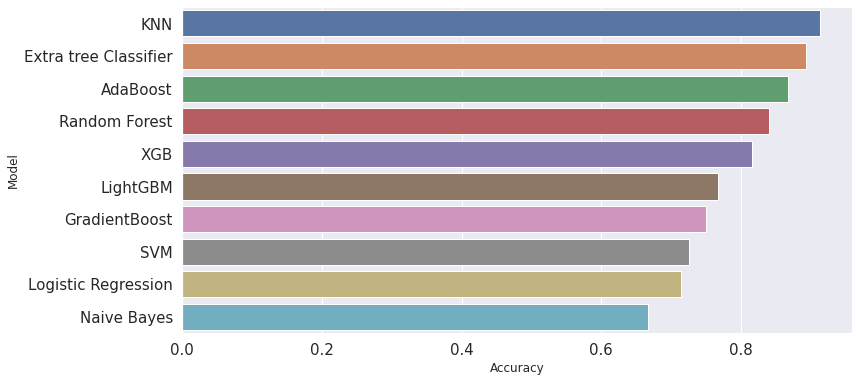

In [140]:
plt.figure(figsize = (12,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# We sort by Accuracies and get the Models
sns.barplot(x = 'Accuracy', y = 'Model', data = model_results, 
            order = model_results.sort_values('Accuracy', ascending=False).Model) ;

In [142]:
## Knn having Heighest accuracy among all classification Models